#### In this notebook, we generated just one single set of data and fit multiple distributions to the data and will test goodness of fit to confirm the best fit. If our data is Poisson, we expect to have Poisson fit as the best fit compare to other distribution fits.

In [8]:
import numpy as np
from scipy import stats
from scipy.stats import chisquare
import DistFit.distfit_v1 as dft

In [2]:
row_count=10000

def data_generation(dist_type, par, row_count):
    if dist_type== 'normal':
        mean, std = par
        data=np.random.normal(mean, std, row_count)
    
    elif dist_type== 'geometric':
        p= par
        data=np.random.geometric(p, row_count)  
       
    elif dist_type== 'binomial':
        n, p= par
        data=np.random.binomial(n, p, row_count)
    
    elif dist_type == 'poisson':
        l= par
        data = np.random.poisson(l, row_count)    
    
    elif dist_type== 'exponential':
        scale= par
        data=np.random.exponential(scale, row_count)
   
    elif dist_type == 'gamma':
        shape , scale = par
        data=np.random.gamma(shape, scale, row_count)
    
    elif dist_type == 'weibull': 
        a, b = par 
        # a= scale parameter b= shape 
        data=b*np.random.weibull(a, row_count) #this is one-parameter Weibull; for 2-D => multiply by b
    
    elif dist_type == 'uniform':
        a,b = par
        data = np.random.uniform(a, b, row_count)
        
    elif dist_type == 'bernoulli':
        a = par
        data = np.random.bernoulli(a, row_count)
    
    else:
        raise ValueError("Change distribution type or modify parameters")
        
    return data

row_count=10000

In [3]:
def chi_square_gof(observed, expected, alpha=0.05, decimal_places=3):
    observed = np.round(np.array(observed), decimal_places)
    expected = np.round(np.array(expected), decimal_places)

    # Ensure observed and expected have the same length
    if len(observed) != len(expected):
        raise ValueError("Observed and expected arrays must have the same length.")

    # Print lengths and exact sums for debugging
    print(f"Length of observed: {len(observed)}")
    print(f"Length of expected: {len(expected)}")
    
    # Print exact sums of observed and expected for debugging
    exact_sum_observed = np.sum(observed)
    exact_sum_expected = np.sum(expected)
    print(f"Exact sum of observed: {exact_sum_observed}")
    print(f"Exact sum of expected: {exact_sum_expected}")

    #Check if the sums of observed and expected frequencies are close
    if not np.allclose(exact_sum_observed, exact_sum_expected, rtol=1e-6):
        raise ValueError("Sums of observed and expected frequencies do not match.")
    print("Observed values:", observed)
    print("Expected values:", expected)

    #Perform the chi-square test with unrounded sums
    chi2_statistic, p_value = chisquare(f_obs=observed, f_exp=expected, ddof=len(observed) - 1)

    #Compare p-value with the significance level
    reject_null_hypothesis = p_value < alpha

    return chi2_statistic, p_value, reject_null_hypothesis

In [4]:
def gof_test(observed_data, expected_data):
    chi_square_test_statistic, p_value = stats.chisquare(observed_data, expected_data) 
  
    #chi square test statistic and p value 
    print('chi_square_test_statistic is : ' + str(chi_square_test_statistic)) 
    print('p_value : ' + str(p_value)) 
    
    #return chi_square_test_statistic, p_value

# Examples Using Fitting Class

### 1) Generating Data

In [5]:
data = data_generation('poisson', 10, row_count) #(1, 0.3)

# Fitting multiple distributions to generated data

### 1: Binomial Fit


Note: When estimating p with very rare events and a small n, using MLE estimator leads to p=0 which sometimes is unrealistic and undesirable. In such cases, use alternative estimators.




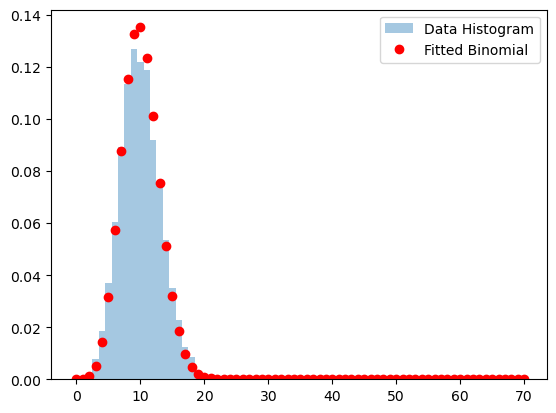

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
0.004781763137317802

In [21]:
model = dft.Fitting(data)
n = 70  # replace with your actual number of trials
observed_data, expected_data, params = model.binomial_fit(n)
#print(observed_data, expected_data, params)
model.binomial_plot(params)
gof_test(observed_data, expected_data)

### 2: Normal Fit

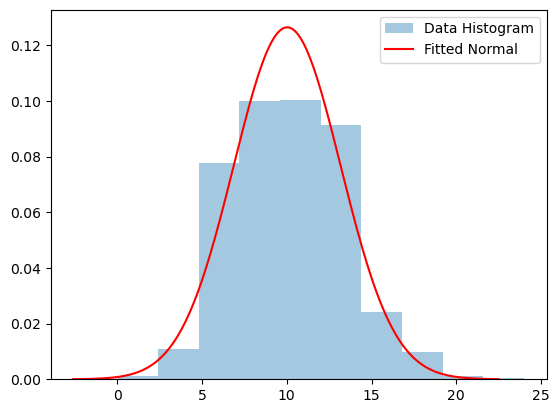

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
0.0068009500009647466

In [22]:
model = dft.Fitting(data)
observed_data, expected_data, params = model.normal_fit()
#print(observed_data, expected_data, params)
model.normal_plot(params)
gof_test(observed_data, expected_data)

### 3: Poisson Fit

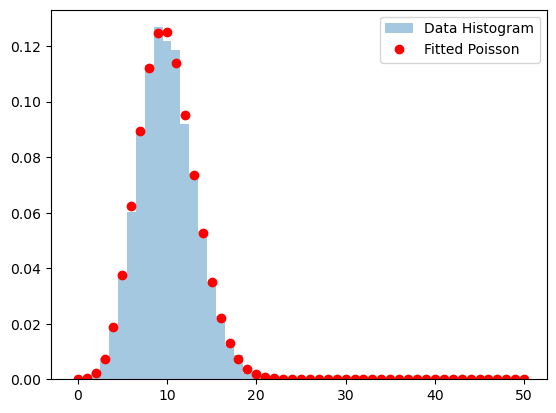

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
0.0006485019604713113

In [23]:
model = dft.Fitting(data)
observed_data, expected_data, params = model.poisson_fit()
#print(observed_data, expected_data, params)
model.poisson_plot(params)
gof_test(observed_data, expected_data)

### 4: Geometric Fit

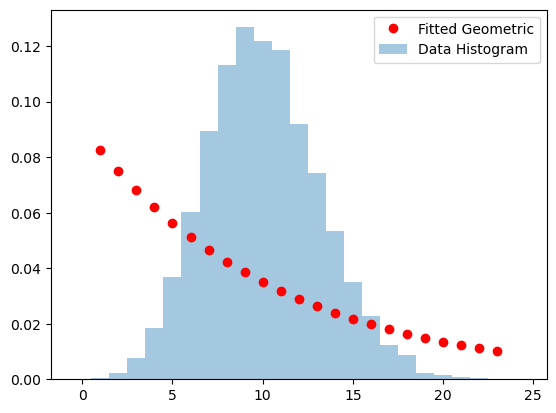

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
0.09954006245572727

In [24]:
model = dft.Fitting(data)
observed_data, expected_data, params = model.geometric_fit()
#print(observed_data, expected_data, params)
model.geometric_plot(params)
gof_test(observed_data, expected_data)

### 5: Uniform Fit

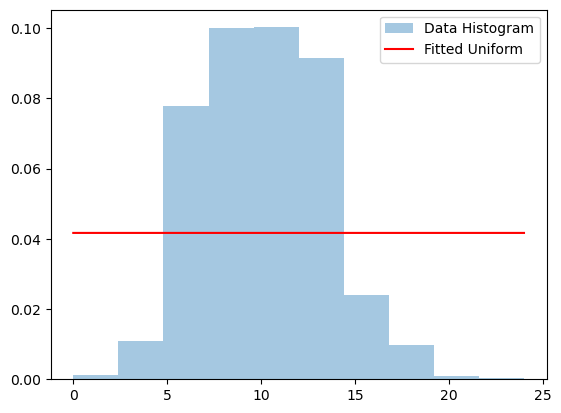

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
0.20453763149769116

In [25]:
model = dft.Fitting(data)
observed_data, expected_data, params = model.uniform_fit()
#print(observed_data, expected_data, params)
model.uniform_plot(params)
gof_test(observed_data, expected_data)

### 6: Exponential Fit

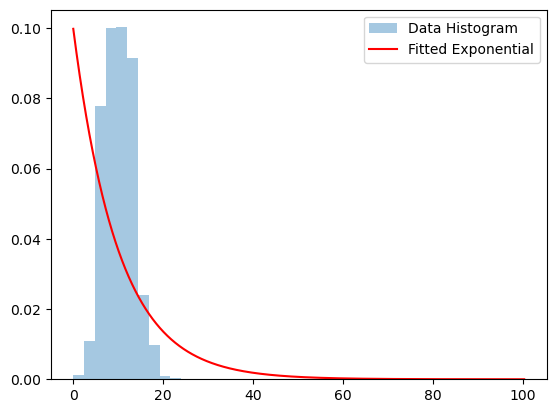

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
0.0073404052316721246

In [26]:
model = dft.Fitting(data)
observed_data, expected_data, params = model.exponential_fit()
#print(observed_data, expected_data, params)
model.exponential_plot(params)
gof_test(observed_data, expected_data)

### 7: Weibull Fit

C:\Users\mehdi.sadeghi\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\mehdi.sadeghi\Desktop\ISYE_6644_Distribution_Fitting-main\01 Code\DistFit\distfit.py:251: RuntimeWarning: invalid value encountered in double_scalars
  alfa_0 = (6*(sum_ln_x_square-sum_ln_x**2/self.size)/((self.size-1)*np.pi**2))**(-0.5)


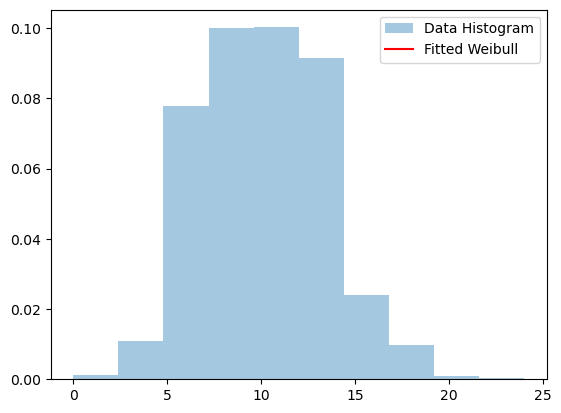

chi_square_test_statistic is : nan
p_value : nan


In [27]:
model = dft.Fitting(data)
observed_data, expected_data, params = model.weibull_fit()
#print(observed_data, expected_data, params)
model.weibull_plot(params)
gof_test(observed_data, expected_data)

### 8: Gamma Fit

C:\Users\mehdi.sadeghi\Desktop\ISYE_6644_Distribution_Fitting-main\01 Code\DistFit\distfit.py:347: RuntimeWarning: divide by zero encountered in power
  y = (beta**(-alfa))*(x**(alfa-1))*(np.exp(-x/beta))/math.gamma(alfa)


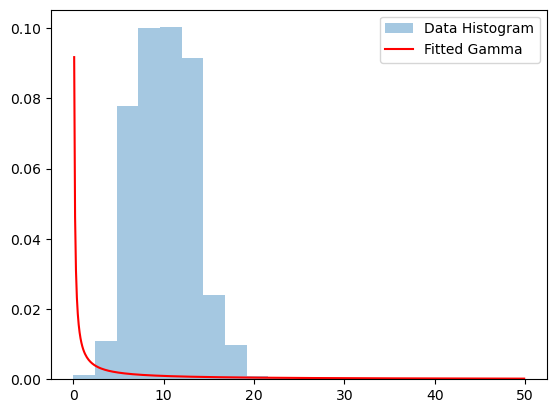

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
0.0005150484919924286

In [29]:
model = dft.Fitting(data)
observed_data, expected_data, params = model.gamma_fit()
#print(observed_data, expected_data, params)
model.gamma_plot(params)
gof_test(observed_data, expected_data)

### 9: Bernoulli

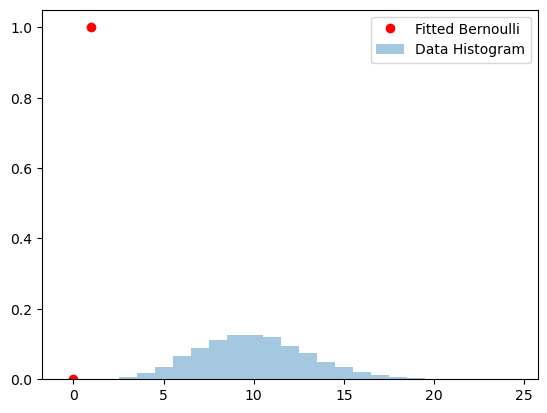

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
9.0154

In [6]:
model = dft.Fitting(data)
observed_data, expected_data, params = model.bernoulli_fit()
#print(observed_data, expected_data, params)
model.bernoulli_plot(params)
gof_test(observed_data, expected_data)